In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import math
from tqdm.auto import tqdm

In [ ]:
BASE_PATH = '/content/gdrive/MyDrive/Datasets/Pattern_Recognition/Dataset/WESAD'
SUBJECT_ID = 2

In [ ]:
with open(os.path.join(BASE_PATH, 'S{}'.format(SUBJECT_ID), 'S{}.pkl'.format(SUBJECT_ID)), 'rb') as pickle_file:
  content = pickle.load(pickle_file, encoding='latin1')

  # Converting the pickle file to dictionary
  dataset_dict = {}
  for key in content['signal']['chest']:
    dataset_dict['signal_chest_'+key] = content['signal']['chest'][key]

  for key in content['signal']['wrist']:
    dataset_dict['signal_wrist_'+key] = content['signal']['wrist'][key]

  dataset_dict['label'] = content['label']

In [ ]:
chest_keys = {
      'ACC': 700, 
      'ECG': 700, 
      'EMG': 700, 
      'EDA': 700, 
      'Resp': 700, 
      'Temp': 700, 
  }
wrist_keys = {
    'BVP': 64, 
    'TEMP': 4, 
    'EDA': 4, 
    'ACC': 32
  }

In [ ]:
def norm_index(hrtz,index,base_hrtz=700): 
  numerator = index//math.ceil(base_hrtz/hrtz) 
  return numerator

In [ ]:
records = []
for idx in tqdm(range(len(dataset_dict['label']))):
  a_record = {}
  for key in chest_keys:

    if 'ACC' in key:
      a_record['signal_chest_'+key] = np.mean(dataset_dict['signal_chest_'+key][idx])
    else:
      a_record['signal_chest_'+key] = dataset_dict['signal_chest_'+key][idx][0]
  
  for key in wrist_keys:
    if 'ACC' in key:
      a_record['signal_wrist_'+key] = np.mean(dataset_dict['signal_wrist_'+key][norm_index(wrist_keys[key], idx)])
    else:
      a_record['signal_wrist_'+key] = dataset_dict['signal_wrist_'+key][norm_index(wrist_keys[key], idx)][0]

  a_record['label'] = dataset_dict['label'][idx]
  records.append(a_record)

  0%|          | 0/4255300 [00:00<?, ?it/s]

In [ ]:
subject_dataframe = pd.DataFrame(records)

In [ ]:
stress_df = subject_dataframe[subject_dataframe.label == 2]

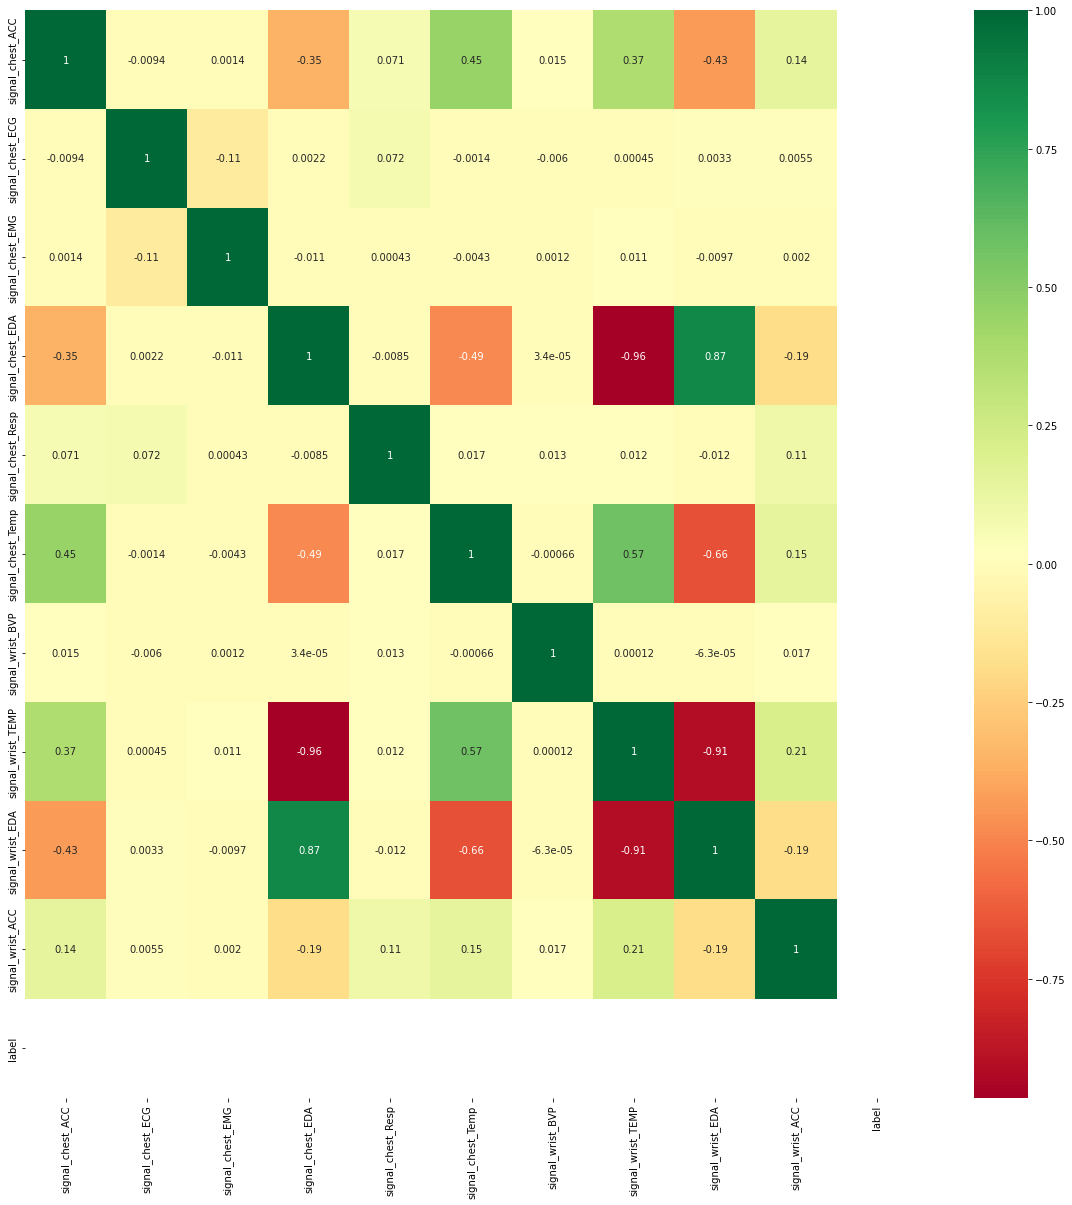

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
corrmat = stress_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(stress_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")